# Medidas de Dispersão e de Posição


In [2]:
import numpy as np
import pandas as pd

In [3]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

## Medidas de Dispersão

In [4]:
# Variancia
enem_sp['NOTA_MT'].var()

np.float64(33659.47050441148)

In [5]:
# Desvio Padrão
enem_sp.NOTA_MT.std()

np.float64(183.46517518158993)

In [6]:
# Média
enem_sp.NOTA_MT.mean()

np.float64(497.5942403088371)

In [ ]:
# Desvio absoluto
# enem_sp.NOTA_MT.mad() -> mad() foi descontinuado do Pandas
# Pesquisei e encontrei uma outra forma de calcular o desvio absoluto médio:
NOTA_MT = enem_sp.NOTA_MT
(NOTA_MT-NOTA_MT.mean()).abs().mean()

np.float64(132.98102283464956)

In [10]:
# Variancia de Redação
enem_sp.NOTA_REDACAO.var()

np.float64(29082.774122780305)

In [ ]:
# Desvio Padrão
enem_sp.NOTA_REDACAO.std()

np.float64(170.53672367786447)

In [12]:
# Média
enem_sp.NOTA_REDACAO.mean()

np.float64(593.0183221986639)

In [13]:
enem_sp.describe()

,IDADE,TP_ESTADO_CIVIL,TP_NACIONALIDADE,TP_ST_CONCLUSAO,CO_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO
count,499940.000000,499940.000000,499940.000000,499940.000000,1.768940e+05,499940.0,499940.0,499940.0,499940.0,499940.000000,499940.000000,499940.000000,499940.000000,499940.000000,499940.000000,499940.000000,499940.000000,499940.000000,499940.000000,499940.000000
mean,20.593387,1.053206,1.029902,1.476085,3.521138e+07,1.0,1.0,1.0,1.0,449.917000,482.228054,491.941262,497.594240,1.072105,125.000760,127.066808,118.760691,124.989359,97.200704,593.018322
std,6.465291,0.380866,0.230986,0.510351,4.430392e+05,0.0,0.0,0.0,0.0,152.982255,161.122963,156.247134,183.465175,0.584314,28.629513,39.846083,36.778882,33.879299,57.787427,170.536724
min,12.000000,0.000000,0.000000,1.000000,1.100306e+07,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,1.000000,1.000000,3.501625e+07,1.0,1.0,1.0,1.0,412.400000,450.600000,490.100000,427.900000,1.000000,120.000000,120.000000,100.000000,120.000000,60.000000,500.000000
50%,18.000000,1.000000,1.000000,1.000000,3.504496e+07,1.0,1.0,1.0,1.0,478.100000,523.700000,538.300000,511.800000,1.000000,120.000000,120.000000,120.000000,120.000000,100.000000,600.000000
75%,21.000000,1.000000,1.000000,2.000000,3.529070e+07,1.0,1.0,1.0,1.0,544.400000,578.100000,576.200000,617.900000,1.000000,140.000000,140.000000,140.000000,140.000000,140.000000,680.000000
max,91.000000,4.000000,4.000000,4.000000,5.300104e+07,1.0,1.0,1.0,1.0,860.900000,822.700000,772.300000,984.700000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


## Medidas de Posição

In [14]:
# Mínimo
enem_sp.NOTA_MT.min()

np.float64(0.0)

In [15]:
# Máximo
enem_sp.NOTA_MT.max()

np.float64(984.7)

In [16]:
# Q1 - Primeiro Quartil
enem_sp.NOTA_MT.quantile(q=0.25)

np.float64(427.9)

In [ ]:
# Q2 - Segundo Quartil (Mediana)
enem_sp.NOTA_MT.quantile(q=0.50)

np.float64(511.8)

In [18]:
# Q3 - Terceiro Quartil
enem_sp.NOTA_MT.quantile(q=0.75)

np.float64(617.9)

In [20]:
# describe() de um único atributo
enem_sp.NOTA_MT.describe()

count    499940.000000
mean        497.594240
std         183.465175
min           0.000000
25%         427.900000
50%         511.800000
75%         617.900000
max         984.700000
Name: NOTA_MT, dtype: float64

# BoxPlot e Outliers

In [21]:
import matplotlib.pyplot as plt

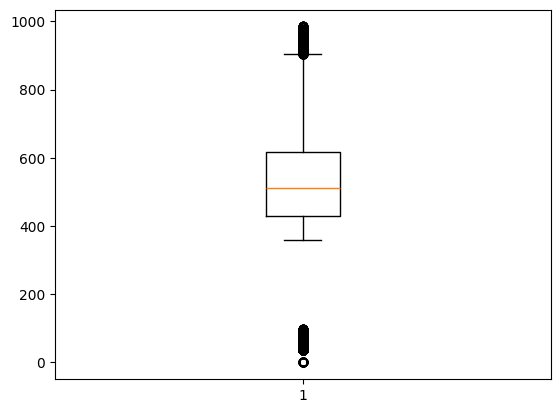

In [22]:
plt.boxplot(enem_sp.NOTA_MT)
plt.show()

 - Seaborn

In [23]:
import seaborn as sns

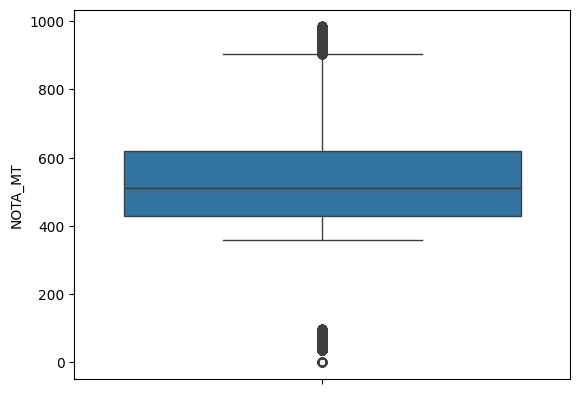

In [24]:
sns.boxplot(y='NOTA_MT', data=enem_sp);

No curso o instrutor usa o plotly para descobrir os valores de limite inferior e limite superior, uma vez que os gráficos ao passar o mouse já informam. Mas como seria caso fosse usado o seaborn que não oferece esses dados? Como calcular?

- Limite Superior: Q3 + 1.5 X IQR
- Limite Inferior: Q1 - 1.5 X IQR

- IQR = Q3 – Q1

In [29]:
# Calculando IQR:
IQR = 617.9 - 427.9
IQR

190.0

In [31]:
# Calculando limite superior
limite_superior = 617.9 + (1.5*IQR)
limite_superior

902.9

In [33]:
# Calculando limite inferior
limite_inferior = 427.9 - (1.5*IQR)
limite_inferior

142.89999999999998

Dúvida: seguindo os calculos o limite inferior deveria ser 142.9. Porém nos gráficos e no curso deu 359.1

In [34]:
# Criando uma tabela de dados usando limite superior
sem_outliers = enem_sp.loc[enem_sp.NOTA_MT <= limite_superior ]

In [36]:
# Baseado no valor do curso
# Criando uma tabela de dados usando limite inferior
sem_outliers = sem_outliers.loc[sem_outliers.NOTA_MT >= 359.1]

In [37]:
sem_outliers.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


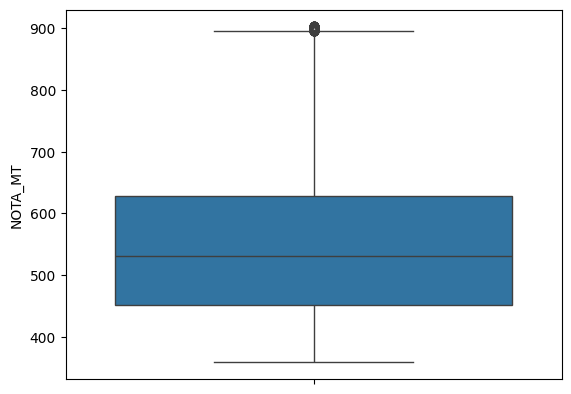

In [40]:
grafico = sns.boxplot(sem_outliers, y="NOTA_MT");

 - Gerando boxplot e verificando outliers das outras disciplinas

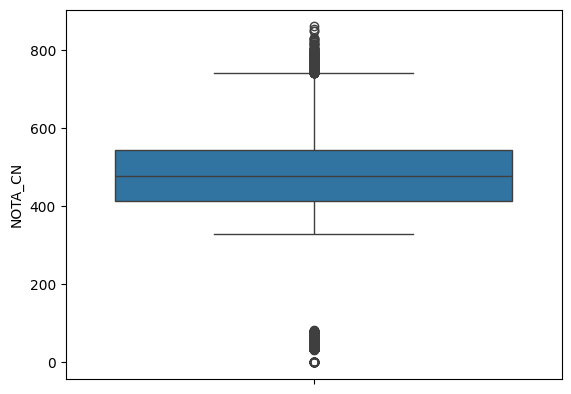

In [41]:
grafico = sns.boxplot(enem_sp, y="NOTA_CN");

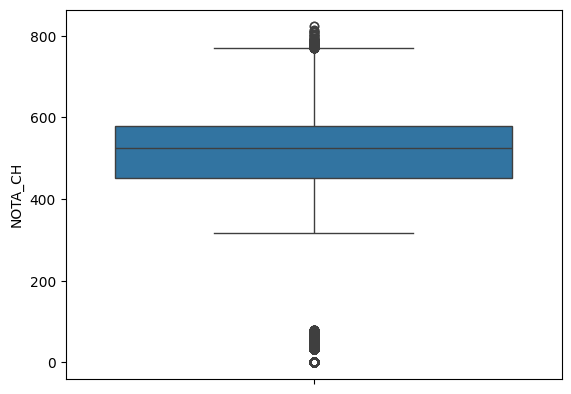

In [42]:
grafico = sns.boxplot(enem_sp, y="NOTA_CH");

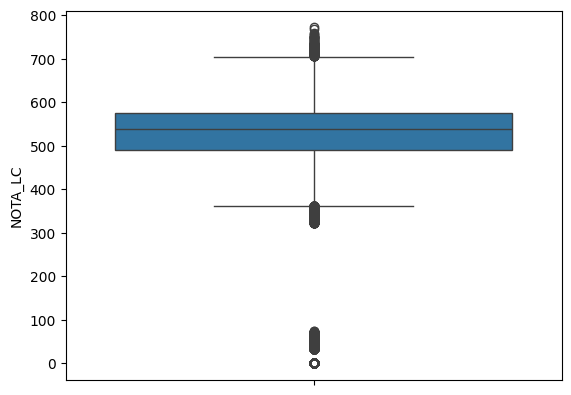

In [43]:
grafico = sns.boxplot(enem_sp, y="NOTA_LC");

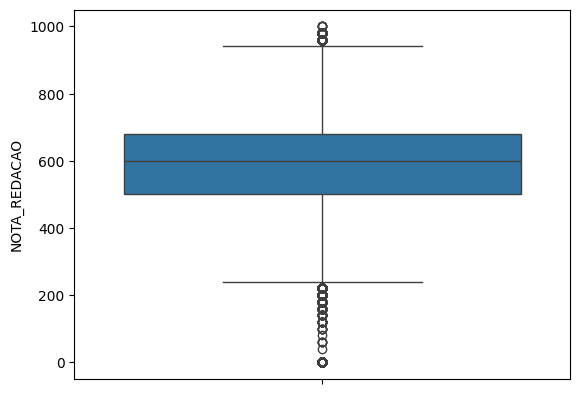

In [44]:
grafico = sns.boxplot(enem_sp, y="NOTA_REDACAO");

 - Gerando boxplot comparando grupos

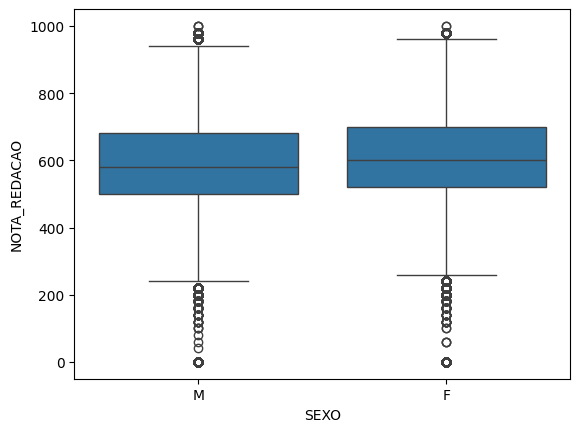

In [47]:
grafico = sns.boxplot(enem_sp, x = 'SEXO', y="NOTA_REDACAO")


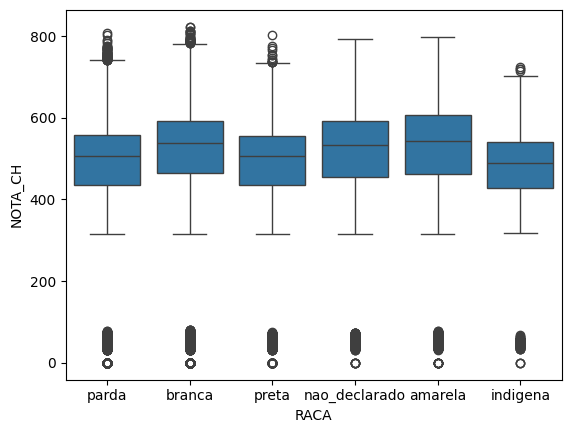

In [48]:
grafico = sns.boxplot(enem_sp, x = 'RACA', y="NOTA_CH")


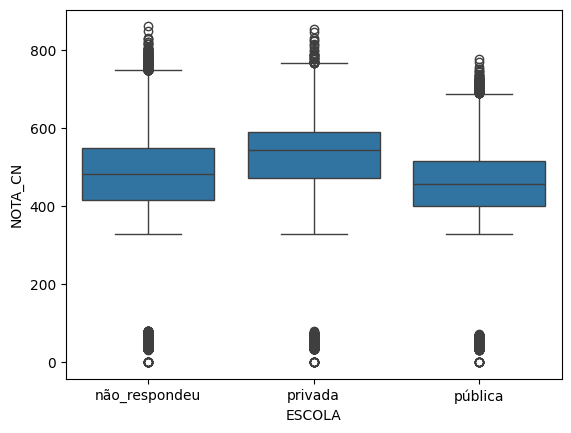

In [49]:
grafico = sns.boxplot(enem_sp, x = 'ESCOLA', y="NOTA_CN")


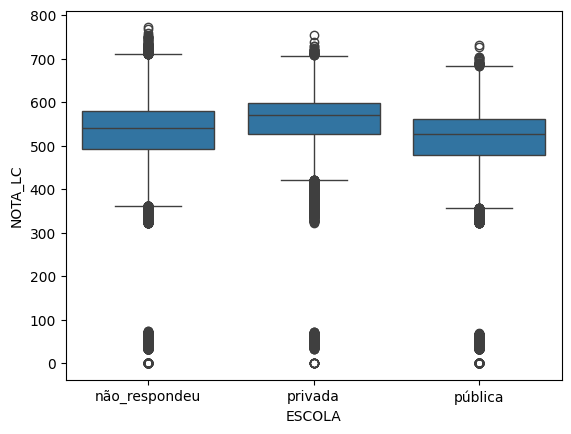

In [50]:
grafico = sns.boxplot(enem_sp, x = 'ESCOLA', y="NOTA_LC")
